1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Sol: For matrices with (n,k) and (k,m) dimensions. To resolve the first entry we need to do K multiplications and (K-1) additions. In total there will be NxM entries in the resulting multiplied matrix. Thus,

No. of multiplications = KxNxM
No. of additions = (K-1)xNxM

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Sol: Time taken by NumPy implemtation is faster as compared to list of lists. The faster execution may be due to:

        1. At each cycle of the loop the type checking and function dispatch is being conducted. In the NumPy library the compiled code is present due to which the type specification is known in advanced hence taking lesser time. 
        
        2. Vectorizing operations remove the slower Python loops.

(Ref: Python Data Science Handbook, Jake VanderPlas)        

In [470]:
#List of lists
import numpy as np
import time
import timeit

A = np.array([range(i,i+3) for i in [1, 2, 3, 4]])
B = np.array([range(i,i+2) for i in [1, 2, 3]])
print(A)
print("\n", B)
row_A = len(A)
col_A = len(A[0])
col_B = len(B[0])

result = [[0] * col_B for _ in range(row_A)]

def mat_mul():
    for i in range(row_A):
        for j in range(col_B):
            sum = 0
            for k in range(col_A):
                sum += A[i][k] * B[k][j]
            result[i][j] = sum
    return result

execution_time = timeit.timeit(mat_mul, number=1000)
result = mat_mul()
print(execution_time)
for row in result:
    print(row)    
# print(result)
        

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

 [[1 2]
 [2 3]
 [3 4]]
0.012095837038941681
[14, 20]
[20, 29]
[26, 38]
[32, 47]


In [9]:
# NumPy 
import timeit

A = np.array([range(i,i+3) for i in [1, 2, 3, 4]])
B = np.array([range(i,i+2) for i in [1, 2, 3]])
print(A)
print("\n", B)
row_A = len(A)
col_A = len(A[0])
col_B = len(B[0])

result = [[0] * col_B for _ in range(row_A)]

def mat_mul():
    return np.dot(A, B)

execution_time = timeit.timeit(mat_mul, number=1000)
result = mat_mul()
print(execution_time)
for row in result:
    print(row)
        

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

 [[1 2]
 [2 3]
 [3 4]]
0.008513361040968448
[14 20]
[20 29]
[26 38]
[32 47]


3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Sol: 1. The time complexity for the method suggested comes out to be: 
$$
O(n^2)
$$
Execution time is:  0.0795998849789612 s

2. If we sort the array using quick sort method then we get a lesser time complexity:
$$
O(nlog(n))
$$
Execution time is:  0.07798163499683142 s


3. When using numpy.median the Execution time is:  0.11219263903331012 s 

In [500]:
def find_highest(A, i):
    highest_index = 0
    for j in range(1, i +1):
        if A[j]>A[highest_index]:
            highest_index = j
    return highest_index        
    
A = np.array([6, 0.7, 20, 9, 10, 1, 2, 3, 4, 5])
n = len(A)

def sort(A):
    for i in range(n-1, 0, -1):
        highest_index = find_highest(A, i)
        A[highest_index], A[i] = A[i], A[highest_index]


sort(A)
def median(A):
    n = len(A)
    if n%2 == 1:
        return A[n//2]
    else:
        mid1 = n//2 -1
        mid2 = n//2
        return (A[mid1] + A[mid2]) / 2
        
def sort_find_med():
    sort(A)
    print("median is: ", median(A))    
    print("Sorted array: ", A)

execution_time = timeit.timeit(sort_find_med, number=1000)
print("Execution time is: ", execution_time)        
        

median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
medi

In [514]:
# Quick Sort Implementation
def partition(A, low, high):
    pivot = A[high]
    i = low - 1
    for j in range(low, high):
        if A[j]<= pivot:
            i = i+1
            (A[i], A[j]) = (A[j], A[i])
    (A[i+1], A[high]) = (A[high], A[i+1])
    return i + 1
    
def quick_sort(A, low, high):
    if low < high:
        pivot = partition(A, low, high)
        quick_sort(A, low, pivot - 1)
        quick_sort(A, high, pivot + 1)

A = np.array([6, 0.7, 20, 9, 10, 1, 2, 3, 4, 5])
n = len(A)
quick_sort(A, 0, n-1)
def median(A):
    n = len(A)
    if n%2 == 1:
        return A[n//2]
    else:
        mid1 = n//2 -1
        mid2 = n//2
        return (A[mid1] + A[mid2]) / 2
        
def sort_find_med():
    sort(A)
    print("median is: ", median(A))    
    print("Sorted array: ", A)

execution_time = timeit.timeit(sort_find_med, number=1000)
print("Execution time is: ", execution_time)        


median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
medi

In [516]:
# numpy.median implementation
# Quick Sort Implementation
def partition(A, low, high):
    pivot = A[high]
    i = low - 1
    for j in range(low, high):
        if A[j]<= pivot:
            i = i+1
            (A[i], A[j]) = (A[j], A[i])
    (A[i+1], A[high]) = (A[high], A[i+1])
    return i + 1
    
def quick_sort(A, low, high):
    if low < high:
        pivot = partition(A, low, high)
        quick_sort(A, low, pivot - 1)
        quick_sort(A, pivot + 1, high)
A = np.array([6, 0.7, 20, 9, 10, 1, 2, 3, 4, 5])
n = len(A)
        Execution time is:  0.07798163499683142
def sort_find_med():
    quick_sort(A, 0, n-1)
    print("median is: ", np.median(A))    
    print("Sorted array: ", A)

execution_time = timeit.timeit(sort_find_med, number=1000)
print("Execution time is: ", execution_time)

median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
median is:  4.5
Sorted array:  [ 0.7  1.   2.   3.   4.   5.   6.   9.  10.  20. ]
medi

4. What is the gradient of the following function with respect to x and y?
$$
{x^2}y+{y^3}sin(x) 
$$
Sol:
w.r.t x -
$$
2xy+{y^3}cos(x) 
$$
w.r.t y -
$$
{x^2}+3{y^2}sin(x) 
$$

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y
(ref: https://pyimagesearch.com/2023/02/27/learning-jax-in-2023-part-2-jaxs-power-tools-grad-jit-vmap-and-pmap/
      https://jax.readthedocs.io/en/latest/quickstart.html)

In [1]:
%pip install jax jaxlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 690.1 kB/s eta 0:00:00m eta 0:00:016m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 MB 683.8 kB/s eta 0:00:00eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 601.5 kB/s eta 0:00:001m1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import jax.numpy as jnp
from jax import grad, jit, vmap

In [19]:
%pip install jac
%pip install autograd

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for jac: filename=jac-0.18.0-py2.py3-none-any.whl size=15552 sha256=993ef9ec272eafbd3e11b7538381986177568a9346ee77ae136b284854c92dba
  Stored in directory: /home/sonali/.cache/pip/wheels/09/a2/ee/e15675f64aae8358dc63ce1360af09846565f4f73bc81ab41a
  Created wheel for ordereddict: filename=ordereddict-1.1-py3-none-any.whl size=3509 sha256=27685e37cebeec639205fa249904ed12913ae641147eb5b70f6bfc8bae1d469f
  Stored in directory: /home/sonali/.cache/pip/wheels/5b/60/d3/6aa5e6a099f4a40cdf45f14743e60f15f9c5d5115885a5a1e2
Successfully built jac ordereddict
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 814.6 kB/s eta 0:00:001m2.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 1.9 MB/s eta 0:00:001.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [430]:
def f(x,y):
    return x**2*y + y**3*jnp.sin(x)

f_bar_x = grad(f, argnums = 0)
f_bar_y = grad(f, argnums = 1)
# x = jnp.array(1.0)
# y = jnp.array(2.0)
# grad_x = f_bar_x(x,y)
# grad_y = f_bar_y(x,y)
grad_x = f_bar_x(1.0,2.0)
grad_y = f_bar_y(1.0,2.0)
                                                                            
print("Derivative with respect to x: ", grad_x)
print("Derivative with respect to y: ", grad_y)

Derivative with respect to x:  8.322418
Derivative with respect to y:  11.0976515


6. Use sympy to confirm that you obtain the same gradient analytically.
(ref: https://medium.com/@ilmunabid/how-to-find-a-gradient-slope-of-a-function-in-python-774f865467d2)

In [432]:
import sympy as sy
x,y = sy.symbols('x,y')
func = x**2*y + y**3*sy.sin(x)
sy.diff(func,x)

2*x*y + y**3*cos(x)

In [434]:
sy.diff(func,y)


x**2 + 3*y**2*sin(x)

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [423]:
class Student:
    def __init__ (self, name, roll, marks):
        self.name = name
        self.roll = roll
        self.marks = marks
    def __str__(self):
        marks_str = ', '.join(f"{subject}: {mark}" for subject, mark in self.marks.items())
        return f"Roll Number: {self.roll}, Name: {self.name}, Marks: {marks_str}"


class Branch:
    def __init__ (self, branch_name):
        self.branch_name = branch_name
        self.students = []
    def student(self, student):
        self.students.append(student)
    def __str__(self):
        return f"Branch: {self.branch_name}, Students: [{', '.join(str(student) for student in self.students)}]"

class Year:
    def __init__ (self, year):
        self.year = year
        self.branches = []
    def branch(self, branch):
        self.branches.append(branch)
    def __str__(self):
        return f"Year: {self.year}, Branches: [{', '.join(str(branch) for branch in self.branches)}]"

class Database:
    def __init__ (self):
        self.years = []
    def year(self, year):
        self.years.append(year)
    def __str__(self):
        return f"Database: [{', '.join(str(year) for year in self.years)}]"

# x=student()
# x.year(2001, 2002) 
# x.display()
student1 = Student("Alice", 1, {"Math": 95, "English": 88})
branch1 = Branch("Computer Science")
branch1.student(student1)
year2024 = Year(2024)
year2024.branch(branch1)

# Create a database and add years to it
database = Database()
database.year(year2024)

# Print the database
print(database)

Database: [Year: 2024, Branches: [Branch: Computer Science, Students: [Roll Number: 1, Name: Alice, Marks: Math: 95, English: 88]]]


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

(Ref: Python Data Science Handbook, Jake VanderPlas)        

In [79]:
%matplotlib inline
import matplotlib as mlt
import matplotlib.pyplot as plt
plt.style.use('classic')

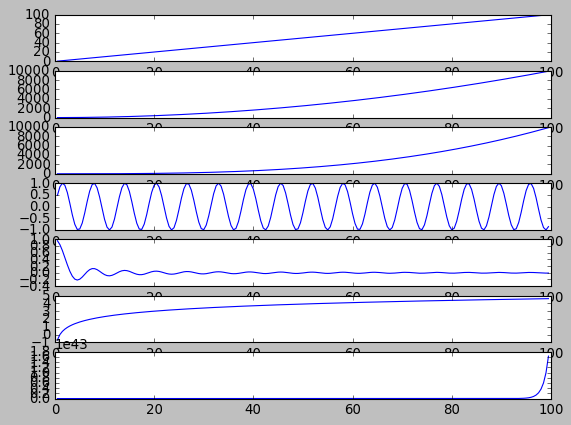

In [125]:
x = np.arange(0.5, 100.0, 0.5)
fig, ax = plt.subplots(7)
y=x
y1=x**2
y2=x**3/100
# fig = plt.figure()
# ax = plt.axes()
# ax.plot(x,y1)
# ax.plot(x,y)
# plt.plot(x,y)
# plt.plot(x,y1)

ax[0].plot(x, y)
ax[1].plot(x, y1)
ax[2].plot(x, y2)
ax[3].plot(x, np.sin(x))
ax[4].plot(x, np.sin(x)/x)
ax[5].plot(x, np.log(x))
ax[6].plot(x, np.exp(x))


10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

(Ref: Python Data Science Handbook, Jake VanderPlas)            

In [357]:
import pandas as pd
x = np.random.uniform(low = 1, high = 2, size = (20,5))
print(x)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd', 'e'])

[[1.45276341 1.27098016 1.01249741 1.64999831 1.27135185]
 [1.38433207 1.17094725 1.83253829 1.35694741 1.76232842]
 [1.82077229 1.72030558 1.92642598 1.55254135 1.21799998]
 [1.66674992 1.2003516  1.91608399 1.62830667 1.3859506 ]
 [1.79472727 1.95594312 1.16859302 1.35454156 1.16925626]
 [1.87479106 1.28458523 1.33498429 1.56132278 1.92243997]
 [1.89340589 1.96931699 1.88729492 1.58168477 1.92743203]
 [1.23169907 1.44239729 1.33769248 1.68582773 1.20336251]
 [1.39967917 1.58004496 1.78327419 1.54536558 1.82176812]
 [1.08612276 1.13904742 1.91529344 1.58708131 1.54542895]
 [1.47503089 1.57511431 1.19263353 1.91551246 1.08023182]
 [1.67203883 1.21821983 1.26799272 1.20465924 1.16007609]
 [1.26989409 1.89308738 1.80815097 1.47513399 1.81723913]
 [1.55879091 1.70549415 1.68017285 1.20899862 1.87628441]
 [1.0275311  1.95252681 1.45213809 1.26839519 1.1897518 ]
 [1.67523734 1.24282267 1.89210432 1.86500572 1.47366624]
 [1.05195631 1.52645202 1.70953339 1.74511499 1.30112874]
 [1.04641007 1

In [359]:
std_dev = df.std()
print(std_dev)
col_with_max_std_dev = std_dev.idxmax()
print(col_with_max_std_dev)
highest_std_dev = std_dev.max()
print(highest_std_dev)

a    0.294457
b    0.334281
c    0.305774
d    0.252527
e    0.290484
dtype: float64
b
0.334280614443116


In [363]:
mean = df.mean(axis = 1)
print(mean)
col_with_min_mean = std_dev.idxmin()
print("Column with minimum mean: ", col_with_min_mean)
lowest_mean = mean.min()
print("Lowest mean value: ", lowest_mean)

0     1.331518
1     1.501419
2     1.647609
3     1.559489
4     1.488612
5     1.595625
6     1.851827
7     1.380196
8     1.626026
9     1.454595
10    1.447705
11    1.304597
12    1.652701
13    1.605948
14    1.378069
15    1.629767
16    1.466837
17    1.512272
18    1.366612
19    1.290114
dtype: float64
Column with minimum mean:  d
Lowest mean value:  1.2901137802998524


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [351]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')
count_lt8 = (df['g'] == 'LT8').sum()
print("Number of rows in the dataframe where the value in the column “g” is “LT8: ", count_lt8)
std_dev_lt8 = df[df['g'] == 'LT8']['f'].std()
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”: ", std_dev_lt8)
std_dev_gt8 = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”: ", std_dev_gt8)
print(df)

Number of rows in the dataframe where the value in the column “g” is “LT8:  16
Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”:  0.5100093278559373
Standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”:  0.2262800939709198
           a         b         c         d         e         f    g
0   1.930454  1.779775  1.438838  1.848086  1.567272  8.564425  GT8
1   1.249216  1.995239  1.400619  1.333037  1.255089  7.233200  LT8
2   1.255018  1.544089  1.990533  1.171384  1.527909  7.488932  LT8
3   1.677909  1.470331  1.425636  1.250410  1.932166  7.756450  LT8
4   1.278674  1.213170  1.241131  1.113328  1.639524  6.485826  LT8
5   1.498652  1.405650  1.533584  1.043283  1.834023  7.315192  LT8
6   1.661801  1.305278  1.204940  1.226565  1.863540  7.262125  LT8
7   1.209262  1.561711  1.922851  1.459227  1.984364  8.137414  GT8
8   1.511286  1.541422  1.549442  1.376845  1.257939  7.236933  LT8
9   1.882226 

12. Write a small piece of code to explain broadcasting in numpy.

    Sol: Broadcasting is a means to vectorize operstions by applying binary ufuncs on arrays of different sizes.
         The following code describes broadcasting operation for three different conditions.
    
         1. M = (3,2) and a =(3,) - Which cannot be broadcasted
    
         2. M = (3,1) and a =(3,) - converts to M = (3,3) and a =(3,3)
    
         3. M = (3,3) and a =(3,) - converts to M = (3,3) and a =(3,3)

(Ref: Python Data Science Handbook, Jake VanderPlas)        

In [209]:
# M = np.ones((3,2))
# a = np.arange(3,)
# M + a                  #Cannot be braodcasted.

M = np.ones((3,1))
print(M)
a = np.arange(3,)
print(a)
M + a



[[1.]
 [1.]
 [1.]]
[0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [211]:
M = np.ones((3,3))
print(M)
a = np.arange(3,)
print(a)
M + a

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [534]:
x = np.random.randint(low=0, high=100, size=10)
print(x)
def argmin_arr(x):
    min = x[0]
    for i in range(1, len(x)):
        if x[i]<min:
            min = x[i]
    return min
minimum = argmin_arr(x)
print("The minimum value is: ", minimum)
print("The index of minimum value is: ", np.argmin(x))

[76 11 31 98 24 57 40 91 92 91]
The minimum value is:  11
The index of minimum value is:  1
